In [1]:
from mediapipe import solutions as mp
import cv2 as cv
import numpy as np

In [2]:
mp_drawing=mp.drawing_utils
mp_holistic=mp.holistic

In [3]:
holistic=mp_holistic.Holistic(min_detection_confidence=0.7)

In [4]:
21*3

63

In [21]:
def draw_landmarks(results,image):
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(0,255,0),thickness=1,circle_radius=1))
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    
    

In [41]:
def extract_landmarks(results):
    lh=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    rh=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    pose=np.array([[landmark.x,landmark.y,landmark.z] for landmark in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    return np.concatenate([lh,rh,pose])

In [123]:
cap=cv.VideoCapture(0)

while cap.isOpened():
    _,frame=cap.read()
    try:
        if cv.waitKey(1)==27:
            cap.release()
            cv.destroyAllWindows()
            break
            
        image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        results=holistic.process(image)
        image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
        draw_landmarks(results,image)
        landmarks=extract_landmarks(results)
    except:
        continue
        
    
    
    cv.imshow('frame',image)

In [103]:
total_landmarks=len(results.pose_landmarks.landmark)+len(results.right_hand_landmarks.landmark)+len(results.right_hand_landmarks.landmark)

In [97]:
total_landmarks

75

In [102]:
len(results.right_hand_landmarks.landmark)

21

In [25]:

from pandas import *

In [90]:
# total_landmarks=99+63+63

In [91]:
# total_landmarks

225

In [104]:
landmark_list=[]
for i in range(75):
    landmark_list=landmark_list+[f'x{i}',f'y{i}',f'z{i}']

In [105]:
len(landmark_list)

225

In [106]:
landmarks.shape

(225,)

In [116]:
df=DataFrame(columns=landmark_list)

In [120]:
df

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z71,x72,y72,z72,x73,y73,z73,x74,y74,z74


In [115]:
class_df=DataFrame(columns=['class'])

In [121]:
class_df

,class


In [130]:

# collecting live data
class_name='ready'

In [134]:
cap=cv.VideoCapture(0)

while cap.isOpened():
    _,frame=cap.read()
    
        
    image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    results=holistic.process(image)
    image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
    draw_landmarks(results,image)
    landmarks=extract_landmarks(results)
    
    
    #adding data to pandas data_frame
    df.loc[len(df)]=landmarks
    class_df.loc[len(class_df)]=class_name
    
    if cv.waitKey(2)==27:
        cap.release()
        cv.destroyAllWindows()
        break
    
    
    cv.imshow('frame',image)

In [75]:
cap.release()

In [136]:
df

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z71,x72,y72,z72,x73,y73,z73,x74,y74,z74
0,0.652753,0.936867,8.539545e-08,0.641387,0.954114,-0.004519,0.638684,0.987602,-0.003898,0.637933,...,0.284211,0.434761,1.667102,0.386109,0.548684,1.733381,0.023179,0.444184,1.721450,0.113127
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.324065,0.409565,1.706963,0.432347,0.530055,1.773373,0.037670,0.419255,1.756699,0.127123
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.370643,0.396329,1.712637,0.472729,0.515827,1.776781,0.076523,0.404809,1.759444,0.153923
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.290197,0.393579,1.699308,0.461690,0.507115,1.767377,-0.008091,0.402336,1.746689,0.141038
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.326613,0.403969,1.677143,0.485363,0.518820,1.740181,0.014160,0.415705,1.719921,0.154494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.620404,0.646723,-2.870359e-08,0.610844,0.616766,-0.001789,0.594639,0.589816,-0.007070,0.585538,...,0.224373,0.446479,1.567131,0.469301,0.557745,1.620954,-0.020980,0.462446,1.623859,0.215473
1007,0.616555,0.640785,-1.806518e-08,0.606046,0.609254,-0.001089,0.590486,0.581970,-0.006404,0.581248,...,0.223458,0.446673,1.565937,0.485641,0.557661,1.620222,-0.021650,0.462479,1.622076,0.229578
1008,0.617724,0.647246,-3.393543e-08,0.606570,0.615978,-0.000999,0.589486,0.589075,-0.005956,0.580435,...,0.222991,0.446028,1.567146,0.467063,0.557385,1.620787,-0.022852,0.462195,1.623318,0.213574
1009,0.618280,0.643157,-2.665707e-08,0.606982,0.612738,-0.001216,0.589717,0.586196,-0.006206,0.579857,...,0.232366,0.446261,1.566542,0.480482,0.557323,1.620283,-0.021775,0.462144,1.622643,0.219585


In [137]:
class_df

,class
0,not ready
1,not ready
2,not ready
3,not ready
4,not ready
...,...
1006,ready
1007,ready
1008,ready
1009,ready


In [114]:
# del df
# del class_df

In [47]:
int(-4.384927e-07)

0

In [52]:
-8.509754e-07 < -4.384927e-07

True

In [138]:
df.to_csv('ready_data.csv')
class_df.to_csv('ready_classes.csv')

In [147]:
start_point1=(180-3,0)

In [148]:
end_point1=(180-3,480)

In [149]:
start_point2=(440,0)

In [150]:
end_point2=(440,480)

In [151]:
cap=cv.VideoCapture(0)

while cap.isOpened():
    _,frame=cap.read()
    try:
        
            
        image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        results=holistic.process(image)
        image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
        draw_landmarks(results,image)
        cv.line(image,start_point1,end_point1,(0,255,0),3)
        cv.line(image,start_point2,end_point2,(0,255,0),3)
        cv.putText(image,'place yourself in such a position ',(20,380),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv.LINE_AA)
        cv.putText(image,'that both shoulders come inside ',(20,400+8),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv.LINE_AA)
        cv.putText(image,'the green box and do ready sign',(20,420+8),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,0),1,cv.LINE_AA)
        # landmarks=extract_landmarks(results)
    except:
        pass
    
    
    if cv.waitKey(1)==27:
            cap.release()
            cv.destroyAllWindows()
            break
    cv.imshow('frame',image)

In [32]:
# range 1
results.pose_landmarks.landmark[14],results.pose_landmarks.landmark[13]

(x: 0.3756353
 y: 0.7029769
 z: -0.2134277
 visibility: 0.9730139,
 x: 0.7888814
 y: 0.67163056
 z: -0.15271327
 visibility: 0.954656)

In [28]:
# range 2
results.pose_landmarks.landmark[14],results.pose_landmarks.landmark[13]

(x: 0.40908027
 y: 0.72627217
 z: -0.1940277
 visibility: 0.9550642,
 x: 0.71907794
 y: 0.70081997
 z: -0.13998124
 visibility: 0.9583299)

In [30]:
# range 3
results.pose_landmarks.landmark[14],results.pose_landmarks.landmark[13]


(x: 0.4103341
 y: 0.7191417
 z: -0.2233502
 visibility: 0.9760119,
 x: 0.69762313
 y: 0.7088432
 z: -0.098089956
 visibility: 0.9778157)

In [8]:
image.shape

(480, 640, 3)

In [10]:
results.pose_landmarks.landmark[24]

x: 0.38702258
y: 1.5778618
z: 0.04150772
visibility: 0.0005064775

In [11]:
results.pose_landmarks.landmark[12]

x: 0.32288572
y: 0.90164894
z: -0.41410336
visibility: 0.9754075

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [154]:
X_train, X_test, y_train, y_test=train_test_split(df,class_df,test_size=0.15,stratify=class_df)

In [155]:
X_train.shape,y_train.shape

((859, 225), (859, 1))

In [157]:
X_test.shape

(152, 225)

In [158]:
pipeline_dict={
    'lr':make_pipeline(StandardScaler(),LogisticRegression()),
    'rc':make_pipeline(StandardScaler(),RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(),RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(),GradientBoostingClassifier()),
}

In [159]:
model_dict={}
for name,pipeline in pipeline_dict.items():
    model=pipeline.fit(X_train,y_train)
    model_dict[name]=model

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:1179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sk

In [160]:
model_dict

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [161]:
evaluating_dict={}
for name,model in model_dict.items():
    evaluating_dict[name]=model.score(X_test,y_test)

In [163]:
evaluating_dict

{'lr': 0.993421052631579, 'rc': 1.0, 'rf': 1.0, 'gb': 1.0}

In [179]:
model=model_dict['rf']

In [168]:
y_p=model.predict(X_test)

In [169]:
actual=y_test

In [167]:
# displaying confusion matrix
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

In [173]:
import matplotlib.pyplot as plt

In [170]:
cm=confusion_matrix(actual,y_p)

In [171]:
cm

array([[80,  0],
       [ 0, 72]], dtype=int64)

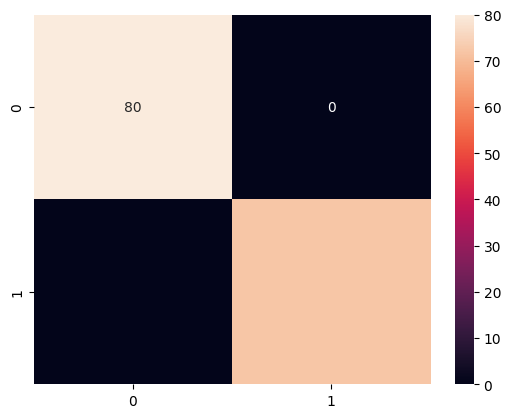

In [177]:
heatmap(cm,annot=True)
plt.savefig('heatmap_ready_model')

In [178]:
import pickle

In [180]:
pickle.dump(model,open('ready_model.pickle','wb'))

In [181]:
import time

In [182]:
# real time predictions

In [197]:
cap=cv.VideoCapture(0)
time.sleep(5)
while cap.isOpened():
    _,frame=cap.read()
    try:
    
        
        image=cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        results=holistic.process(image)
        image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
    
        draw_landmarks(results,image)
        cv.line(image,start_point1,end_point1,(0,255,0),3)
        cv.line(image,start_point2,end_point2,(0,255,0),3)
        
        landmarks=extract_landmarks(results)
        
        text=model.predict(np.expand_dims(landmarks,0))[0]
        cv.putText(image,text,(400,400),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(255,0,0),1,cv.LINE_AA)
    except:
        pass
    
    if cv.waitKey(2)==27:
        cap.release()
        cv.destroyAllWindows()
        break
    
    
    cv.imshow('frame',image)

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not ha

In [184]:
model.predict(X_test)

array(['not ready', 'ready', 'not ready', 'ready', 'not ready', 'ready',
       'ready', 'ready', 'not ready', 'not ready', 'ready', 'ready',
       'ready', 'not ready', 'ready', 'ready', 'ready', 'ready',
       'not ready', 'not ready', 'not ready', 'ready', 'ready', 'ready',
       'ready', 'ready', 'ready', 'not ready', 'not ready', 'not ready',
       'not ready', 'not ready', 'not ready', 'not ready', 'ready',
       'ready', 'not ready', 'not ready', 'ready', 'ready', 'ready',
       'ready', 'not ready', 'not ready', 'not ready', 'not ready',
       'ready', 'not ready', 'not ready', 'not ready', 'not ready',
       'not ready', 'ready', 'ready', 'ready', 'not ready', 'not ready',
       'not ready', 'ready', 'ready', 'ready', 'not ready', 'ready',
       'not ready', 'ready', 'ready', 'ready', 'not ready', 'not ready',
       'not ready', 'ready', 'ready', 'not ready', 'ready', 'not ready',
       'ready', 'not ready', 'not ready', 'not ready', 'ready', 'ready',
       'ready

In [192]:
model.predict(np.expand_dims(X_test.values[0],0),)

C:\Users\vivek chouhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['not ready'], dtype=object)